In [1]:
%pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib as plt

/Users/marcoayuob/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
file_path = '/Users/marcoayuob/RR_project/RR_project/Final Data -EPL_Cleaned_2000_to_2025.csv'
#file_path = '/Users/akshma/Documents/DS/semester4/RR/RRprojectrepo/RR_project/Final Data -EPL_Cleaned_2000_to_2025.csv'
df = pd.read_csv(file_path)

In [4]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9440 entries, 0 to 9439
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9440 non-null   object 
 1   Date      5878 non-null   object 
 2   HomeTeam  9440 non-null   object 
 3   AwayTeam  9440 non-null   object 
 4   FTHG      9440 non-null   int64  
 5   FTAG      9440 non-null   int64  
 6   FTR       9440 non-null   object 
 7   HTHG      9440 non-null   int64  
 8   HTAG      9440 non-null   int64  
 9   HTR       9440 non-null   object 
 10  Referee   9440 non-null   object 
 11  HS        9440 non-null   int64  
 12  AS        9440 non-null   int64  
 13  HST       9440 non-null   int64  
 14  AST       9440 non-null   int64  
 15  HC        9440 non-null   int64  
 16  AC        9440 non-null   int64  
 17  HF        9440 non-null   int64  
 18  AF        9440 non-null   int64  
 19  HY        9440 non-null   int64  
 20  AY        9440 non-null   int6

(  Div        Date  HomeTeam       AwayTeam  FTHG  FTAG FTR  HTHG  HTAG HTR  \
 0  E0  2000-08-19  Charlton       Man City     4     0   H     2     0   H   
 1  E0  2000-08-19   Chelsea       West Ham     4     2   H     1     0   H   
 2  E0  2000-08-19  Coventry  Middlesbrough     1     3   A     1     1   D   
 3  E0  2000-08-19     Derby    Southampton     2     2   D     1     2   A   
 4  E0  2000-08-19     Leeds        Everton     2     0   H     2     0   H   
 
    ...  HF  AF  HY  AY  HR  AR   WHH  WHD   WHA  Season  
 0  ...  13  12   1   2   0   0  2.10  3.2  3.10   00-01  
 1  ...  19  14   1   2   0   0  1.44  3.6  6.50   00-01  
 2  ...  15  21   5   3   1   0  2.30  3.2  2.62   00-01  
 3  ...  11  13   1   1   0   0  2.00  3.2  3.20   00-01  
 4  ...  21  20   1   3   0   0  1.61  3.5  4.50   00-01  
 
 [5 rows x 27 columns],
 None)

In [5]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

In [6]:
#handling missing data
for col in ['WHH', 'WHD', 'WHA']:
    df[col] = df[col].fillna(df[col].median())

In [7]:
#new column-goal difference
df['GoalDiff'] = df['FTHG'] - df['FTAG']  
df['MatchResult'] = df['FTR'].map({'H': 1, 'D': 0, 'A': -1}) 

In [8]:
# Extract date parts
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [9]:
categorical_cols = ['HomeTeam', 'AwayTeam', 'Referee', 'Season']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [10]:
duplicates = df.duplicated().sum()


In [11]:
df = df.sort_values(['HomeTeam', 'Date'])

In [12]:
# Home team averages
df['HomeTeam_Goals_Last5'] = (
    df.groupby('HomeTeam')['FTHG'].transform(lambda x: x.rolling(5, min_periods=1).mean())
)
df['HomeTeam_Concede_Last5'] = (
    df.groupby('HomeTeam')['FTAG'].transform(lambda x: x.rolling(5, min_periods=1).mean())
)

In [13]:
# Away team averages
df = df.sort_values(['AwayTeam', 'Date'])
df['AwayTeam_Goals_Last5'] = (
    df.groupby('AwayTeam')['FTAG'].transform(lambda x: x.rolling(5, min_periods=1).mean())
)
df['AwayTeam_Concede_Last5'] = (
    df.groupby('AwayTeam')['FTHG'].transform(lambda x: x.rolling(5, min_periods=1).mean())
)

In [14]:
# 4. Win streaks (last 5 games)
def win_streak(series):
    return (series == 'H').astype(int).rolling(5, min_periods=1).sum()

df = df.sort_values(['HomeTeam', 'Date'])
df['Home_WinStreak_Last5'] = (
    df.groupby('HomeTeam')['FTR'].transform(win_streak)
)

df = df.sort_values(['AwayTeam', 'Date'])
df['Away_WinStreak_Last5'] = (
    df.groupby('AwayTeam')['FTR'].transform(lambda x: (x == 'A').astype(int).rolling(5, min_periods=1).sum())
)



In [15]:
df = df.dropna()

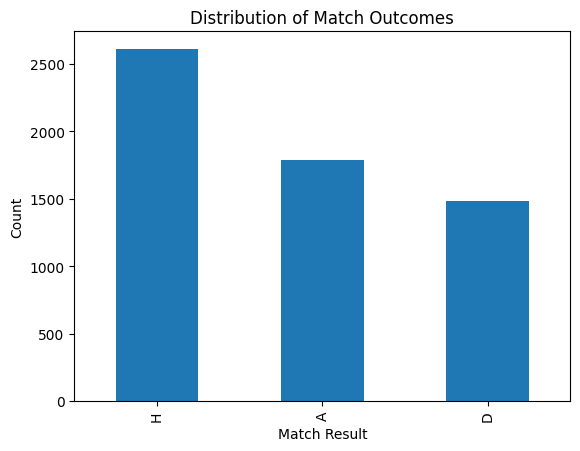

In [18]:
# Plot: Match outcome distribution
import matplotlib.pyplot as plt
df['FTR'].value_counts().plot(kind='bar')
plt.title('Distribution of Match Outcomes')
plt.xlabel('Match Result')
plt.ylabel('Count')
plt.show()

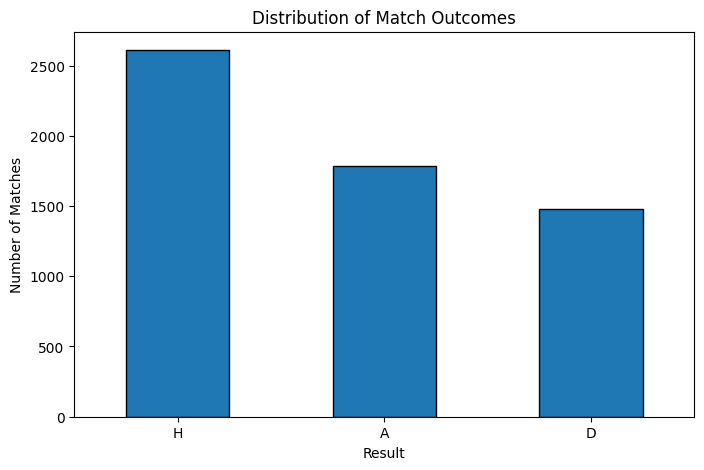

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Match Outcome Distribution
plt.figure(figsize=(8, 5))
df['FTR'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Distribution of Match Outcomes')
plt.xlabel('Result')
plt.ylabel('Number of Matches')
plt.xticks(rotation=0)
plt.show()

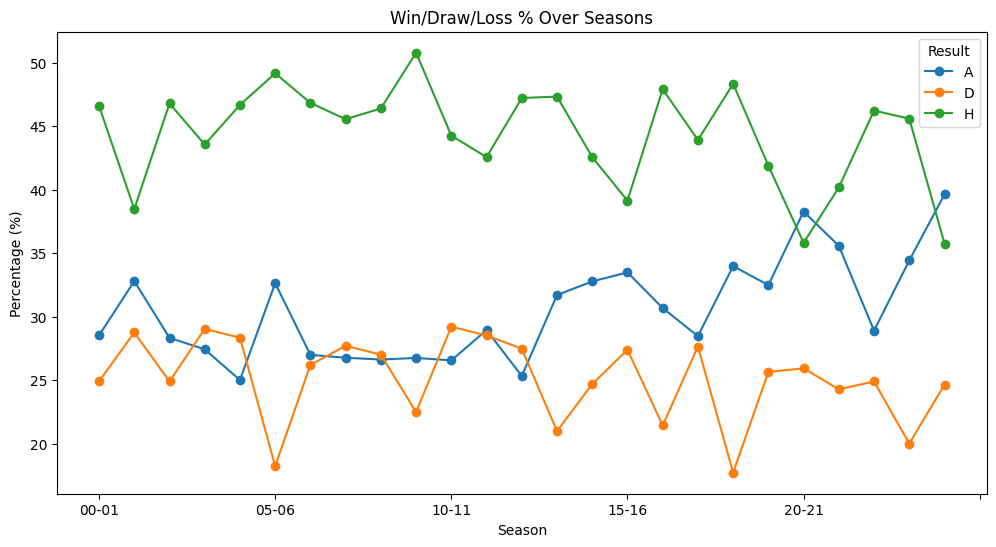

In [20]:
# Match Outcomes Over Seasons
season_outcomes = df.groupby('Season')['FTR'].value_counts(normalize=True).unstack().fillna(0) * 100
season_outcomes.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Win/Draw/Loss % Over Seasons')
plt.ylabel('Percentage (%)')
plt.xlabel('Season')
plt.legend(title='Result')
plt.show()

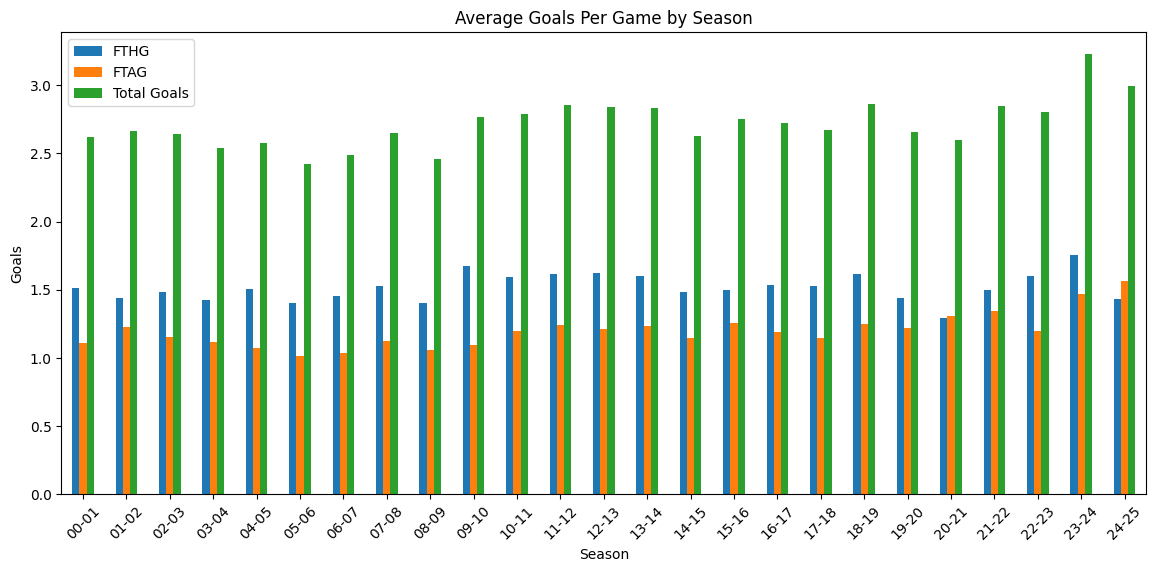

In [21]:
# Average Goals Per Game by Season
avg_goals = df.groupby('Season')[['FTHG', 'FTAG']].mean()
avg_goals['Total Goals'] = avg_goals['FTHG'] + avg_goals['FTAG']
avg_goals[['FTHG', 'FTAG', 'Total Goals']].plot(kind='bar', figsize=(14, 6))
plt.title('Average Goals Per Game by Season')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.show()

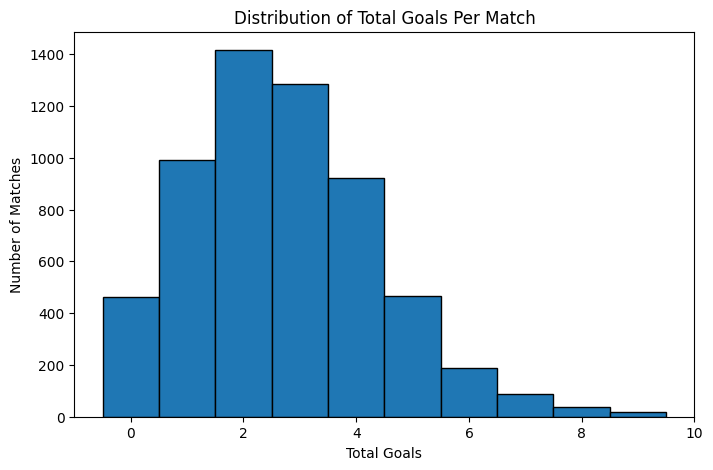

In [22]:
#Total Goals Per Match
df['TotalGoals'] = df['FTHG'] + df['FTAG']
plt.figure(figsize=(8, 5))
df['TotalGoals'].plot(kind='hist', bins=range(0, 11), edgecolor='black', align='left')
plt.title('Distribution of Total Goals Per Match')
plt.xlabel('Total Goals')
plt.ylabel('Number of Matches')
plt.show()

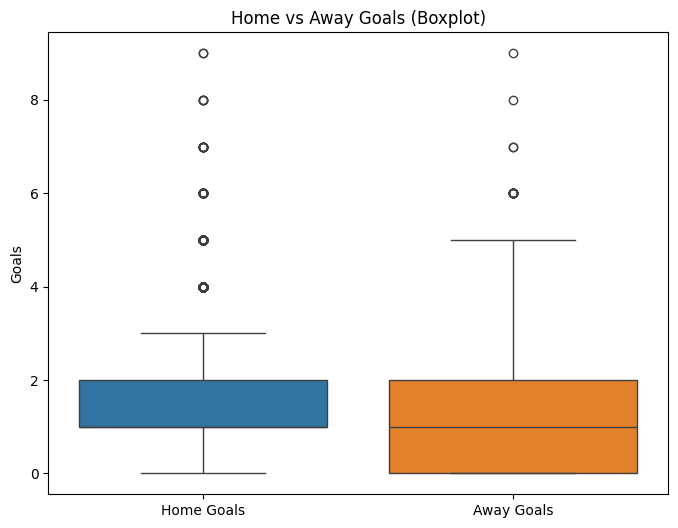

In [23]:
# Home vs Away Goals 
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['FTHG', 'FTAG']])
plt.title('Home vs Away Goals (Boxplot)')
plt.ylabel('Goals')
plt.xticks([0, 1], ['Home Goals', 'Away Goals'])
plt.show()

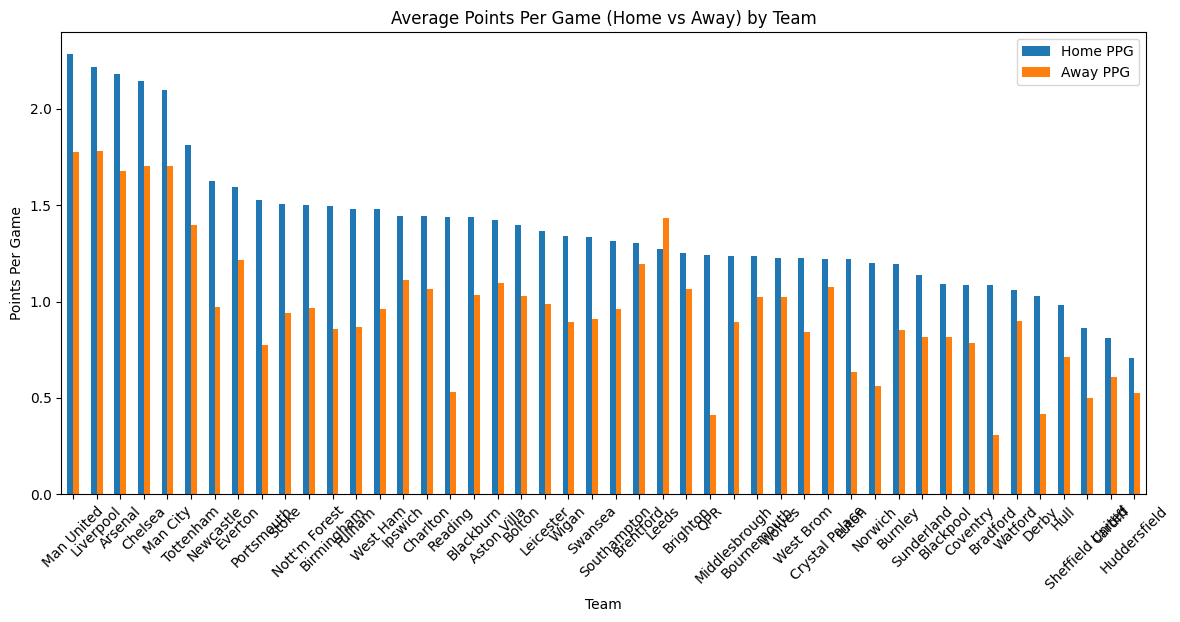

In [24]:
# Average Points Per Game (Home vs Away) by Team
df['HomePoints'] = df['FTR'].map({'H': 3, 'D': 1, 'A': 0})
df['AwayPoints'] = df['FTR'].map({'H': 0, 'D': 1, 'A': 3})

home_ppg = df.groupby('HomeTeam')['HomePoints'].mean().sort_values(ascending=False)
away_ppg = df.groupby('AwayTeam')['AwayPoints'].mean().sort_values(ascending=False)

ppg_df = pd.DataFrame({
    'Home PPG': home_ppg,
    'Away PPG': away_ppg
}).sort_values(by='Home PPG', ascending=False)

ppg_df.plot(kind='bar', figsize=(14, 6))
plt.title('Average Points Per Game (Home vs Away) by Team')
plt.ylabel('Points Per Game')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.show()

/var/folders/d6/n6pspgm12mqdk124xkztz2pr0000gn/T/ipykernel_25685/944682588.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  season_goals = df.groupby('Season').apply(lambda x: (x['FTHG'] + x['FTAG']).sum())
/var/folders/d6/n6pspgm12mqdk124xkztz2pr0000gn/T/ipykernel_25685/944682588.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Season', y='Total Goals', data=season_goals_df, palette='Purples_d', edgecolor='black')


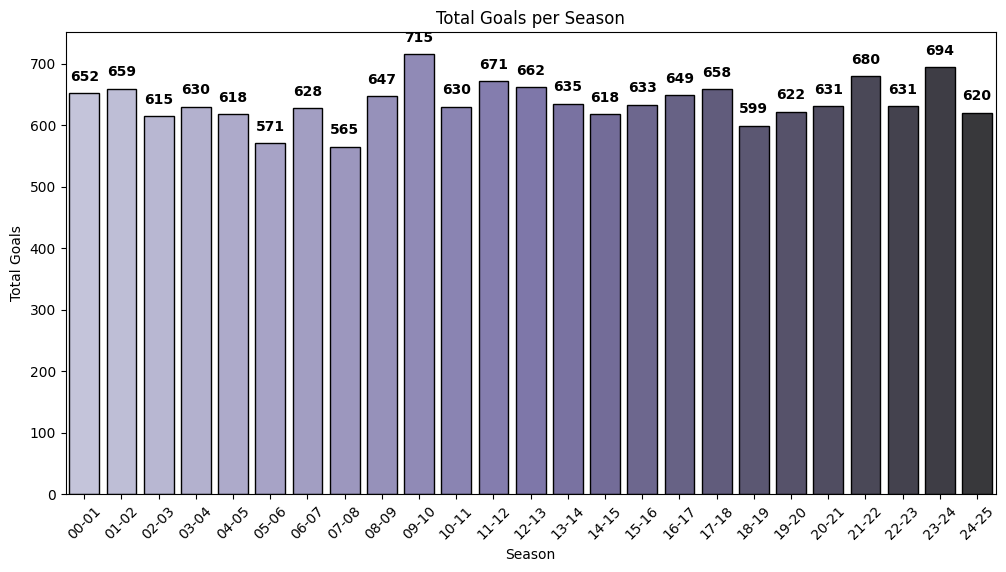

In [25]:
#Season with Most Total Goals
season_goals = df.groupby('Season').apply(lambda x: (x['FTHG'] + x['FTAG']).sum())
season_goals_df = season_goals.reset_index()
season_goals_df.columns = ['Season', 'Total Goals']
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Total Goals', data=season_goals_df, palette='Purples_d', edgecolor='black')
plt.title('Total Goals per Season')
plt.xlabel('Season')
plt.ylabel('Total Goals')
for i, v in enumerate(season_goals_df['Total Goals']):
    plt.text(i, v + 20, int(v), ha='center', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

/var/folders/d6/n6pspgm12mqdk124xkztz2pr0000gn/T/ipykernel_25685/2073888045.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='Total Goals', data=total_goals_df, palette='Greens_d', edgecolor='black')


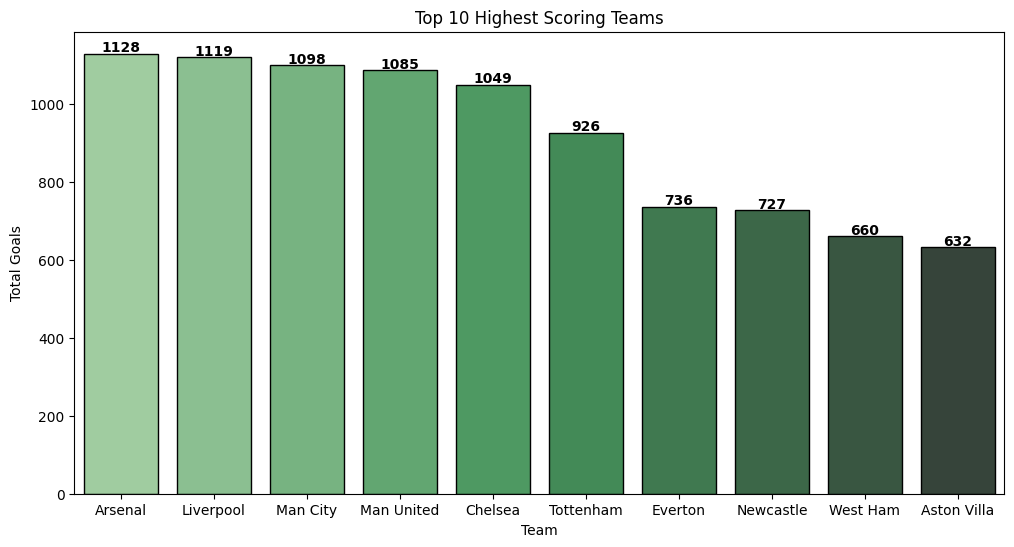

In [26]:

total_goals = df.groupby('HomeTeam')['FTHG'].sum() + df.groupby('AwayTeam')['FTAG'].sum()
total_goals_df = total_goals.sort_values(ascending=False).head(10).reset_index()
total_goals_df.columns = ['Team', 'Total Goals']
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='Total Goals', data=total_goals_df, palette='Greens_d', edgecolor='black')
plt.title('Top 10 Highest Scoring Teams')
plt.xlabel('Team')
plt.ylabel('Total Goals')
for i, v in enumerate(total_goals_df['Total Goals']):
    plt.text(i, v + 5, int(v), ha='center', fontweight='bold')
plt.show()

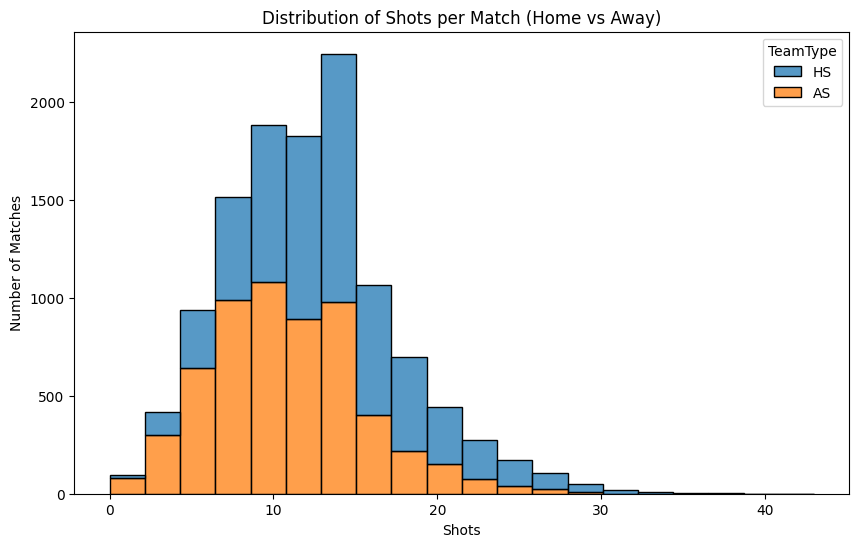

In [27]:
# Distribution of Shots per Match
shots_df = pd.melt(df[['HS', 'AS']], var_name='TeamType', value_name='Shots')
plt.figure(figsize=(10, 6))
sns.histplot(data=shots_df, x='Shots', hue='TeamType', multiple='stack', bins=20, edgecolor='black')
plt.title('Distribution of Shots per Match (Home vs Away)')
plt.xlabel('Shots')
plt.ylabel('Number of Matches')
plt.show()

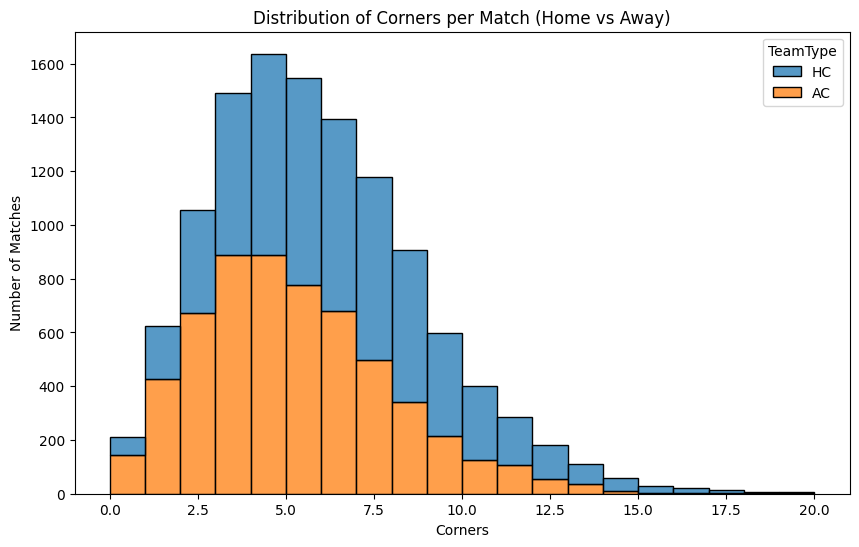

In [28]:
# Distribution of Corners per Match
corners_df = pd.melt(df[['HC', 'AC']], var_name='TeamType', value_name='Corners')
plt.figure(figsize=(10, 6))
sns.histplot(data=corners_df, x='Corners', hue='TeamType', multiple='stack', bins=20, edgecolor='black')
plt.title('Distribution of Corners per Match (Home vs Away)')
plt.xlabel('Corners')
plt.ylabel('Number of Matches')
plt.show()